Objective- Comparing healthcare providers on their relative cost-effectiveness using claims data.

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplcursors
from sklearn.preprocessing import StandardScaler


In [3]:
df= pd.read_excel('providers_data.xlsx')

In [4]:
df.head()

,General Practitioner (GP) ID,Drugs cost per capita,Consultation costs per capita,Laboratory costs per capita,Radiology costs per capita,Hospital admission costs per capita,Referrals per capita,Percentage population 50+,Percentage population low SES,Percentage population Diabetics
0,13,603,186,118,0,72,1.1,0.69,0.18,0.13
1,27,744,207,156,0,44,0.8,0.66,0.16,0.14
2,38,695,280,181,1,20,1.2,0.66,0.19,0.15
3,10,520,209,100,0,12,0.8,0.63,0.06,0.16
4,30,600,41,164,12,89,1.0,0.61,0.20,0.09


In [5]:
standardized_df = df.copy()

In [6]:
standardized_df.drop(columns='General Practitioner (GP) ID', inplace=True)

In [7]:
# Standardizing the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(standardized_df)

In [8]:
standardized_data = pd.DataFrame(standardized_data, columns =standardized_df.columns)

In [9]:
standardized_data.head()

,Drugs cost per capita,Consultation costs per capita,Laboratory costs per capita,Radiology costs per capita,Hospital admission costs per capita,Referrals per capita,Percentage population 50+,Percentage population low SES,Percentage population Diabetics
0,1.282732,-0.062233,-0.826476,-0.855327,0.559586,-0.248741,2.334374,0.047053,0.878346
1,2.214643,0.167048,-0.243803,-0.855327,-0.387718,-1.158768,2.024227,-0.266636,1.154555
2,1.890787,0.964072,0.139535,-0.536175,-1.199694,0.054602,2.024227,0.203898,1.430765
3,0.734161,0.188884,-1.102479,-0.855327,-1.470352,-1.158768,1.714080,-1.835082,1.706974
4,1.262904,-1.645364,-0.121135,2.974495,1.134736,-0.552083,1.507315,0.360743,-0.226492


In [10]:
first_column = df['General Practitioner (GP) ID']

In [11]:
standardized_data = pd.concat([first_column, standardized_data], axis=1)

In [12]:
standardized_data.head()

,General Practitioner (GP) ID,Drugs cost per capita,Consultation costs per capita,Laboratory costs per capita,Radiology costs per capita,Hospital admission costs per capita,Referrals per capita,Percentage population 50+,Percentage population low SES,Percentage population Diabetics
0,13,1.282732,-0.062233,-0.826476,-0.855327,0.559586,-0.248741,2.334374,0.047053,0.878346
1,27,2.214643,0.167048,-0.243803,-0.855327,-0.387718,-1.158768,2.024227,-0.266636,1.154555
2,38,1.890787,0.964072,0.139535,-0.536175,-1.199694,0.054602,2.024227,0.203898,1.430765
3,10,0.734161,0.188884,-1.102479,-0.855327,-1.470352,-1.158768,1.714080,-1.835082,1.706974
4,30,1.262904,-1.645364,-0.121135,2.974495,1.134736,-0.552083,1.507315,0.360743,-0.226492


In [13]:
#Adding Cost profile column by averaging parameters related to cost
standardized_data['Cost Profile'] = standardized_data[['Drugs cost per capita',
       'Consultation costs per capita', 'Laboratory costs per capita',
       'Radiology costs per capita','Referrals per capita']].mean(axis=1)

In [14]:
#Adding Risk profile column by avaeraging the parameters related to risk factors
standardized_data['Risk Profile'] = standardized_data[['Percentage population 50+',
       'Percentage population low SES', 'Percentage population Diabetics ']].mean(axis=1)

In [15]:
standardized_data.head()

,General Practitioner (GP) ID,Drugs cost per capita,Consultation costs per capita,Laboratory costs per capita,Radiology costs per capita,Hospital admission costs per capita,Referrals per capita,Percentage population 50+,Percentage population low SES,Percentage population Diabetics,Cost Profile,Risk Profile
0,13,1.282732,-0.062233,-0.826476,-0.855327,0.559586,-0.248741,2.334374,0.047053,0.878346,-0.142009,1.086591
1,27,2.214643,0.167048,-0.243803,-0.855327,-0.387718,-1.158768,2.024227,-0.266636,1.154555,0.024758,0.970715
2,38,1.890787,0.964072,0.139535,-0.536175,-1.199694,0.054602,2.024227,0.203898,1.430765,0.502564,1.219630
3,10,0.734161,0.188884,-1.102479,-0.855327,-1.470352,-1.158768,1.714080,-1.835082,1.706974,-0.438706,0.528657
4,30,1.262904,-1.645364,-0.121135,2.974495,1.134736,-0.552083,1.507315,0.360743,-0.226492,0.383763,0.547189


In [16]:
mean_x = standardized_data['Risk Profile'].mean()
mean_y = standardized_data['Cost Profile'].mean()

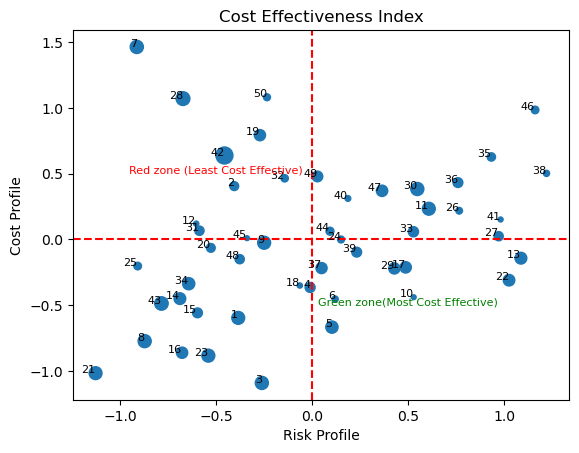

In [38]:
#Plotting scatter plot for Risk VS Cost Profile
plt.scatter(standardized_data['Risk Profile'], standardized_data['Cost Profile'], s=df['Hospital admission costs per capita'])
for i, txt in enumerate(standardized_data['General Practitioner (GP) ID']):
    plt.annotate(txt, (standardized_data['Risk Profile'][i], standardized_data['Cost Profile'][i]), fontsize=8, ha='right')
plt.axvline(x=mean_x, color='r',linestyle='--')
plt.axhline(y=mean_y, color='r',linestyle='--')
plt.xlabel('Risk Profile')
plt.ylabel('Cost Profile')
plt.text(-0.5, 0.5, 'Red zone (Least Cost Effective)', fontsize=8, color='red', ha='center')
plt.text(0.5, -0.5, 'Green zone(Most Cost Effective)', fontsize=8, color='green', ha='center')
plt.title ('Cost Effectiveness Index')
plt.show()

Healthcare providers in the red zone are those serving low-risk profile patients yet incurring higher billing costs. To address this, contracts with such providers can be terminated or transitioned to value-based payment models, ensuring cost-efficiency and better alignment with patient care outcomes.